In [1]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
from torch.nn import MSELoss
from torch.nn.functional import mse_loss
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import time
import glob
from compute_distance import compute_distance
from scipy.spatial import cKDTree

In [2]:
h_n = 50
input_n = 4
e_idx = -1
num_epochs = 1000

lr = [1e-3, 1e-3, 1e-3]

In [3]:

# # %%
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# class Swish(nn.Module):
#     def __init__(self, inplace=True):
#         super(Swish, self).__init__()
#         self.inplace = inplace

#     def forward(self, x):
#         if self.inplace:
#             x.mul_(torch.sigmoid(x))
#             return x
#         else:
#             return x * torch.sigmoid(x)

# # Improved network architecture with better initialization and regularization
# class ImprovedNet(nn.Module):
#     def __init__(self, output_dim=1):
#         super(ImprovedNet, self).__init__()
#         self.main = nn.Sequential(
#             nn.Linear(input_n, h_n),
#             nn.LayerNorm(h_n),  # Add layer normalization
#             Swish(),
#             nn.Dropout(0.1),    # Add dropout for regularization
            
#             nn.Linear(h_n, h_n),
#             nn.LayerNorm(h_n),
#             Swish(),
#             nn.Dropout(0.1),
            
#             nn.Linear(h_n, h_n),
#             nn.LayerNorm(h_n),
#             Swish(),
#             nn.Dropout(0.1),
            
#             nn.Linear(h_n, h_n),
#             nn.LayerNorm(h_n),
#             Swish(),
            
#             nn.Linear(h_n, output_dim),
#         )
        
#         # Xavier initialization
#         self.apply(self._init_weights)
    
#     def _init_weights(self, m):
#         if isinstance(m, nn.Linear):
#             nn.init.xavier_normal_(m.weight)
#             nn.init.constant_(m.bias, 0)
    
#     def forward(self, x):
#         return self.main(x)

# class Net1(ImprovedNet):
#     def __init__(self):
#         super(Net1, self).__init__(output_dim=1)

# class Net2(ImprovedNet):
#     def __init__(self):
#         super(Net2, self).__init__(output_dim=1)

# class Net3(ImprovedNet):
#     def __init__(self):
#         super(Net3, self).__init__(output_dim=1)



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = "cpu"
print(f"Using device: {device}")

class Swish(nn.Module):
    def __init__(self, inplace=True):
        super(Swish, self).__init__()
        self.inplace = inplace

    def forward(self, x):
        if self.inplace:
            x.mul_(torch.sigmoid(x))
            return x
        else:
            return x * torch.sigmoid(x)


class Net1(nn.Module):

    #The __init__ function stack the layers of the 
    #network Sequentially 
    def __init__(self):
        super(Net1, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),
            nn.Linear(h_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),
            nn.Linear(h_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),

            nn.Linear(h_n,1),
        )
    #This function defines the forward rule of
    #output respect to input.
    def forward(self,x):
        output = self.main(x)
        return  output

class Net2(nn.Module):

    #The __init__ function stack the layers of the 
    #network Sequentially 
    def __init__(self):
        super(Net2, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),
            nn.Linear(h_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),
            nn.Linear(h_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),

            nn.Linear(h_n,1),
        )
    #This function defines the forward rule of
    #output respect to input.
    def forward(self,x):
        output = self.main(x)
        return  output

class Net3(nn.Module):

    #The __init__ function stack the layers of the 
    #network Sequentially 
    def __init__(self):
        super(Net3, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),
            nn.Linear(h_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),
            nn.Linear(h_n,h_n),
            #nn.Tanh(),
            #nn.Sigmoid(),
            Swish(),
            ################## below are added layers

            nn.Linear(h_n,1),
        )
    #This function defines the forward rule of
    #output respect to input.
    def forward(self,x):
        output = self.main(x)
        return  output

Using device: cuda


In [5]:
#Dataset
class CustomDataset(Dataset):
    def __init__(self, data):
        self.inputs = torch.tensor(data[:, [0, 1, 5, 7]], dtype=torch.float32).to(device)
        self.targets = torch.tensor(data[:, [2, 3, 4]], dtype=torch.float32).to(device)


    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]


In [6]:
# Define absolute paths for saved weights
weights_dir = r"models\label_free"  # Use raw string (r"...") to avoid escape character issues
net1_path = os.path.join(weights_dir, f"label_free_1_epoch_{e_idx}.pth")
net2_path = os.path.join(weights_dir, f"label_free_2_epoch_{e_idx}.pth")
net3_path = os.path.join(weights_dir, f"label_free_3_epoch_{e_idx}.pth")

In [7]:
def initialize_models():
    # Move models to GPU
    net1 = Net1().to(device)
    net2 = Net2().to(device)
    net3 = Net3().to(device)

    print(f"net1 is on: {next(net1.parameters()).device}")
    print(f"net2 is on: {next(net2.parameters()).device}")
    print(f"net3 is on: {next(net3.parameters()).device}")

    def init_normal(m):
        if type(m) == nn.Linear:
            nn.init.kaiming_normal_(m.weight)

    # use the modules apply function to recursively apply the initialization   
    net1.apply(init_normal)
    net2.apply(init_normal)
    net3.apply(init_normal)

    optimizer1 = optim.Adam(net1.parameters(), lr=lr[0], betas = (0.9,0.99),eps = 10**-15)
    optimizer2	= optim.Adam(net2.parameters(), lr=lr[1], betas = (0.9,0.99),eps = 10**-15)
    optimizer3	= optim.Adam(net3.parameters(), lr=lr[2], betas = (0.9,0.99),eps = 10**-15)

    scheduler1 = optim.lr_scheduler.CosineAnnealingLR(optimizer1, T_max=100, eta_min=1e-6)
    scheduler2 = optim.lr_scheduler.CosineAnnealingLR(optimizer2, T_max=100, eta_min=1e-6)
    scheduler3 = optim.lr_scheduler.CosineAnnealingLR(optimizer3, T_max=100, eta_min=1e-6)

    if os.path.exists(net1_path):
        net1.load_state_dict(torch.load(net1_path))
        net1.train()
        print(f"✅ Loaded weights from {net1_path}")
    else:
        e_idx = -1
        print(f"⚠️ No saved weights found at {net1_path}. Training from scratch.")

    if os.path.exists(net2_path):
        net2.load_state_dict(torch.load(net2_path))
        net2.train()
        print(f"✅ Loaded weights from {net2_path}")
    else:
        e_idx = -1
        print(f"⚠️ No saved weights found at {net2_path}. Training from scratch.")

    if os.path.exists(net3_path):
        net3.load_state_dict(torch.load(net3_path))
        net3.train()
        print(f"✅ Loaded weights from {net3_path}")
    else:
        e_idx = -1
        print(f"⚠️ No saved weights found at {net3_path}. Training from scratch.")

    return net1, net2, net3, optimizer1, optimizer2, optimizer3, scheduler1, scheduler2, scheduler3

In [8]:
def criterion(x_batch, y_batch, net1, net2, net3, mse_loss, pde_weight, u_loss_weight, v_loss_weight, p_loss_weight, periodic_loss_on, rho=1.0, nu=0.01, ds=0.4, dp = 0.1):
    x, y, d, n = x_batch[:, 0:1], x_batch[:, 1:2], x_batch[:, 2:3], x_batch[:, 3:4]
    xStart = 0
    xEnd = ds

    x.requires_grad_()
    y.requires_grad_()
    d.requires_grad_()
    n.requires_grad_()

    net_in = torch.cat((x, y, d, n), dim=1)
    u = net1(net_in)
    v = net2(net_in)
    p = net3(net_in)

    u = u.view(len(u), -1)
    v = v.view(len(v), -1)
    p = p.view(len(p), -1)

    distances = compute_distance(x, y, d, n, ds)
    u_hard = u * distances
    v_hard = v * distances
    p_hard = (xStart-x)*0 + dp*(xEnd-x)/ds + 0*y + (xStart - x)*(xEnd - x)*p

    # === Periodic boundary matching based on tilted DLD geometry ===
    tolerance = 1e-4
    tilt = ds / n
    y_bot_line = tilt * (x / ds)
    y_top_line = ds + tilt * (x / ds)

    bottom_mask = (torch.abs(y - y_bot_line) < tolerance).squeeze()
    top_mask = (torch.abs(y - y_top_line) < tolerance).squeeze()

    x_top_np = x[top_mask].detach().cpu().numpy()
    d_top_np = d[top_mask].detach().cpu().numpy()
    n_top_np = n[top_mask].detach().cpu().numpy()

    x_bot_np = x[bottom_mask].detach().cpu().numpy()
    d_bot_np = d[bottom_mask].detach().cpu().numpy()
    n_bot_np = n[bottom_mask].detach().cpu().numpy()

    top_keys = np.hstack([x_top_np, d_top_np, n_top_np])
    bot_keys = np.hstack([x_bot_np, d_bot_np, n_bot_np])

    tree_bot = cKDTree(bot_keys)
    _, match_idx = tree_bot.query(top_keys, k=1)

    top_idx_tensor = torch.where(top_mask)[0]
    bot_idx_tensor = torch.where(bottom_mask)[0][match_idx]

    periodic_loss = (
        mse_loss(u_hard[top_idx_tensor], u_hard[bot_idx_tensor]) +
        mse_loss(v_hard[top_idx_tensor], v_hard[bot_idx_tensor]) +
        mse_loss(p_hard[top_idx_tensor], p_hard[bot_idx_tensor])
    )

    # === Boundary conditions ===
    boundary_zero_loss = torch.tensor(0.0, device=x.device)
    # boundary_condition = (distances < 1e-6)
    # boundary_zero_loss = mse_loss(u_hard[boundary_condition], torch.zeros_like(u_hard[boundary_condition]))
    # boundary_zero_loss += mse_loss(v_hard[boundary_condition], torch.zeros_like(v_hard[boundary_condition]))

    inlet_condition = (torch.abs(x) < 1e-6)
    u_avg = 0.01 / d
    u_max = (3 / 2) * u_avg
    u_inlet = u_max * (1 - (4 * (((ds / 2) - y) ** 2)) / ((ds - d) ** 2))
    inlet_loss = mse_loss(u_hard[inlet_condition], u_inlet[inlet_condition])

    outlet_condition = (torch.abs(ds - x) < 1e-6)
    p_inlet_loss = mse_loss(p_hard[inlet_condition], torch.ones_like(p_hard[inlet_condition]) * 40)
    p_outlet_loss = mse_loss(p_hard[outlet_condition], torch.zeros_like(p_hard[outlet_condition]))

    # === PDE Residuals ===
    u_x = torch.autograd.grad(u_hard, x, grad_outputs=torch.ones_like(x), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(x), create_graph=True)[0]
    u_y = torch.autograd.grad(u_hard, y, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, y, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    p_x = torch.autograd.grad(p_hard, x, grad_outputs=torch.ones_like(x), create_graph=True)[0]
    # p_xx = torch.autograd.grad(p_x, x, grad_outputs=torch.ones_like(x), create_graph=True)[0]

    v_x = torch.autograd.grad(v_hard, x, grad_outputs=torch.ones_like(x), create_graph=True)[0]
    v_xx = torch.autograd.grad(v_x, x, grad_outputs=torch.ones_like(x), create_graph=True)[0]
    v_y = torch.autograd.grad(v_hard, y, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    v_yy = torch.autograd.grad(v_y, y, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    p_y = torch.autograd.grad(p_hard, y, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    # p_yy = torch.autograd.grad(p_y, y, grad_outputs=torch.ones_like(y), create_graph=True)[0]

    loss_1 = u_hard * u_x + v_hard * u_y - nu * (u_xx + u_yy) + (1 / rho) * p_x
    loss_2 = u_hard * v_x + v_hard * v_y - nu * (v_xx + v_yy) + (1 / rho) * p_y
    loss_3 = u_x + v_y  # continuity

    # rhs = -rho * (u_x ** 2 + 2 * u_y * v_x + v_y ** 2)
    # lhs = p_xx + p_yy
    # loss_poisson = mse_loss(lhs, rhs)

    loss_poisson = torch.tensor(0.0, device=x.device)  # Placeholder for Poisson loss

    loss_1 = mse_loss(loss_1, torch.zeros_like(loss_1))
    loss_2 = mse_loss(loss_2, torch.zeros_like(loss_2))
    loss_3 = mse_loss(loss_3, torch.zeros_like(loss_3))

    loss_4 = mse_loss(u_hard, y_batch[:, 0:1])
    loss_5 = mse_loss(v_hard, y_batch[:, 1:2])
    loss_6 = mse_loss(p_hard, y_batch[:, 2:3])

    total_loss = pde_weight * (loss_1 + loss_2 + loss_3)
    total_loss += loss_4 * u_loss_weight + loss_5 * v_loss_weight + loss_6 * p_loss_weight 
    # total_loss += loss_6 / 100

    return (
        total_loss, loss_1, loss_2, loss_3,
        loss_4, loss_5, loss_6, loss_poisson,
        inlet_loss, p_inlet_loss, p_outlet_loss, boundary_zero_loss, periodic_loss
    )

In [9]:
#loss track

def main():
    # Load dataset (modify file path accordingly)
    # file_path = os.path.join(os.getcwd(), "data/unscaled/merged_dataset_REU.parquet")

    # Load data using pandas and convert to NumPy array
    # df = pd.read_parquet(file_path)  # Load Parquet file
    # data = df.to_numpy(dtype=np.float32)  # Convert to NumPy array

    csv_dir      = os.path.join(os.getcwd(), "data", "unscaled_p")
    pattern      = os.path.join(csv_dir, "TrP4_*_10.csv") 
    csv_paths    = sorted(glob.glob(pattern))           

    if not csv_paths:
        raise FileNotFoundError(f"No files matched: {pattern}")

    frames = [pd.read_csv(p) for p in csv_paths]
    df     = pd.concat(frames, ignore_index=True)
    data        = df.to_numpy(dtype=np.float32)
    
    dataset = CustomDataset(data)
    drt = len(dataset)
    dataloader = DataLoader(dataset, batch_size=10000, shuffle=True)
    print(drt)
    num_batches = len(dataloader)
    print(num_batches)

    # Initialize models and optimizers
    net1, net2, net3, optimizer1, optimizer2, optimizer3, scheduler1, scheduler2, scheduler3 = initialize_models()

    # Training loop
    mse_loss = MSELoss()
    start_time = time.time()
    
    # Initialize minimum loss to a large value
    min_loss = float('inf')
    
    # Lists to store loss history
    loss_history = {
        'epoch': [],
        'batch': [],
        'loss': [],
        'loss_1': [],
        'loss_2': [],
        'loss_3': [],
        'loss_4': [],
        'loss_5': [],
        'loss_6': [],
        'loss_poisson': [],
        'inlet_loss': [],
        'p_inlet_loss': [],
        'p_outlet_loss': [],
        'boundary_zero_loss': [],
        'periodic_loss': [],
    }

    loss_history_by_epoch = {
        'epoch': [],
        'loss': [],
        'loss_1': [],
        'loss_2': [],
        'loss_3': [],
        'loss_4': [],
        'loss_5': [],
        'loss_6': [],
        'loss_poisson': [],
        'inlet_loss': [],
        'p_inlet_loss': [],
        'p_outlet_loss': [],
        'boundary_zero_loss': [],
        'periodic_loss': [],
    }

    u_loss_weight = 1
    v_loss_weight = 50
    p_loss_weight = 1
    pde_weight = 1
    periodic_loss_on = 0
    
    for epoch in range(e_idx+1, num_epochs+1):
        total_loss, total_loss_1, total_loss_2, total_loss_3, total_loss_4, total_loss_5, total_loss_6, total_loss_poisson, total_inlet_loss, total_p_inlet_loss, total_p_outlet_loss, total_boundary_zero_loss, total_periodic_loss = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        num_batches = len(dataloader)
        batch_idx = 0

        if epoch >= 100:
            v_loss_weight = 100
            # p_loss_weight = 1 / 10

        if epoch >= 200:
            v_loss_weight = 200
            # p_loss_weight = 1 / 100
            # u_loss_weight = 10
        
        if epoch >= 300:
            v_loss_weight = 300
            # u_loss_weight = 50
            # pde_weight = 10

        if epoch >= 400:
            v_loss_weight = 500
            # u_loss_weight = 100
            # pde_weight = 30

        if epoch >= 500:
            pde_weight = 1
            # u_loss_weight = 1
            # v_loss_weight = 1
            # periodic_loss_on = 1

        if epoch >= 600:
            pde_weight = 100
        
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    
            net1.zero_grad()
            net2.zero_grad()
            net3.zero_grad()

            loss, loss_1, loss_2, loss_3, loss_4, loss_5, loss_6, loss_poisson, inlet_loss, p_inlet_loss, p_outlet_loss, boundary_zero_loss, periodic_loss = criterion(x_batch, y_batch, net1, net2, net3, mse_loss, pde_weight, u_loss_weight, v_loss_weight, p_loss_weight, periodic_loss_on)
            loss.backward()

            optimizer1.step()
            optimizer2.step()
            optimizer3.step()

            # Store losses in history
            loss_history['epoch'].append(epoch)
            loss_history['batch'].append(batch_idx)
            loss_history['loss'].append(loss.item())
            loss_history['loss_1'].append(loss_1.item())
            loss_history['loss_2'].append(loss_2.item())
            loss_history['loss_3'].append(loss_3.item())
            loss_history['loss_4'].append(loss_4.item())
            loss_history['loss_5'].append(loss_5.item())
            loss_history['loss_6'].append(loss_6.item())
            loss_history['loss_poisson'].append(loss_poisson.item())
            loss_history['inlet_loss'].append(inlet_loss.item())
            loss_history['p_inlet_loss'].append(p_inlet_loss.item())
            loss_history['p_outlet_loss'].append(p_outlet_loss.item())
            loss_history['boundary_zero_loss'].append(boundary_zero_loss.item())
            loss_history['periodic_loss'].append(periodic_loss.item())

    
            # Accumulate loss values
            total_loss += loss.item()
            total_loss_1 += loss_1.item()
            total_loss_2 += loss_2.item()
            total_loss_3 += loss_3.item()
            total_loss_4 += loss_4.item()
            total_loss_5 += loss_5.item()
            total_loss_6 += loss_6.item()
            total_loss_poisson += loss_poisson.item()
            total_inlet_loss += inlet_loss.item()
            total_p_inlet_loss += p_inlet_loss.item()
            total_p_outlet_loss += p_outlet_loss.item()
            total_boundary_zero_loss += boundary_zero_loss.item()
            total_periodic_loss += periodic_loss.item()

            batch_idx += 1

        # scheduler1.step()
        # scheduler2.step()
        # scheduler3.step()

        # Compute average loss
        avg_loss = total_loss / num_batches
        avg_loss_1 = total_loss_1 / num_batches
        avg_loss_2 = total_loss_2 / num_batches
        avg_loss_3 = total_loss_3 / num_batches
        avg_loss_4 = total_loss_4 / num_batches
        avg_loss_5 = total_loss_5 / num_batches
        avg_loss_6 = total_loss_6 / num_batches
        avg_loss_poisson = total_loss_poisson / num_batches
        avg_inlet_loss = total_inlet_loss / num_batches
        avg_p_inlet_loss = total_p_inlet_loss / num_batches
        avg_p_outlet_loss = total_p_outlet_loss / num_batches
        avg_boundary_zero_loss = total_boundary_zero_loss / num_batches
        avg_periodic_loss = total_periodic_loss / num_batches

        # Store average losses by epoch
        loss_history_by_epoch['epoch'].append(epoch)
        loss_history_by_epoch['loss'].append(avg_loss)
        loss_history_by_epoch['loss_1'].append(avg_loss_1)
        loss_history_by_epoch['loss_2'].append(avg_loss_2)
        loss_history_by_epoch['loss_3'].append(avg_loss_3)
        loss_history_by_epoch['loss_4'].append(avg_loss_4)
        loss_history_by_epoch['loss_5'].append(avg_loss_5)
        loss_history_by_epoch['loss_6'].append(avg_loss_6)
        loss_history_by_epoch['loss_poisson'].append(avg_loss_poisson)
        loss_history_by_epoch['inlet_loss'].append(avg_inlet_loss)
        loss_history_by_epoch['p_inlet_loss'].append(avg_p_inlet_loss)
        loss_history_by_epoch['p_outlet_loss'].append(avg_p_outlet_loss)
        loss_history_by_epoch['boundary_zero_loss'].append(avg_boundary_zero_loss)
        loss_history_by_epoch['periodic_loss'].append(avg_periodic_loss)
        
        # Save models if the current loss is lower than the minimum loss
        if avg_loss < min_loss:
            min_loss = avg_loss
            torch.save(net1.state_dict(), f'models/label_free/label_free_1_epoch_{epoch}.pth')
            torch.save(net2.state_dict(), f'models/label_free/label_free_2_epoch_{epoch}.pth')
            torch.save(net3.state_dict(), f'models/label_free/label_free_3_epoch_{epoch}.pth')
            print(f"Epoch {epoch}: New minimum loss {min_loss:.7f}, models saved")

        elif epoch % 100 == 0:
            min_loss = avg_loss
            torch.save(net1.state_dict(), f'models/label_free/label_free_1_epoch_{epoch}.pth')
            torch.save(net2.state_dict(), f'models/label_free/label_free_2_epoch_{epoch}.pth')
            torch.save(net3.state_dict(), f'models/label_free/label_free_3_epoch_{epoch}.pth')
            print(f"Epoch {epoch}: Models saved")
    
        if epoch % 2 == 0:
            elapsed_time = time.time() - start_time
            print(f"Epoch [{epoch}/{num_epochs}], Avg Loss: {avg_loss:.7f}, Avg Loss_1: {avg_loss_1:.7f}, "
                  f"Avg Loss_2: {avg_loss_2:.7f}, Avg Loss_3: {avg_loss_3:.7f}, Avg Loss_4: {avg_loss_4:.7f}, Avg Loss_5: {avg_loss_5:.7f}, Avg Loss_6: {avg_loss_6:.7f}, Avg Loss_Poisson: {avg_loss_poisson:.7f}, Avg Inlet Loss: {avg_inlet_loss:.7f}, Avg P Inlet Loss: {avg_p_inlet_loss:.7f}, Avg P Outlet Loss: {avg_p_outlet_loss:.7f}, Avg Boundary Zero Loss: {avg_boundary_zero_loss:.7f}, Avg Periodic Loss: {avg_periodic_loss:.7f}, Time: {elapsed_time:.2f}s")
            start_time = time.time()

    # Save losses to CSV
    loss_df = pd.DataFrame(loss_history)

    loss_csv_path = 'results/label_free/training_losses_label_free.csv'
    
    if os.path.exists(loss_csv_path):
        existing_loss_df = pd.read_csv(loss_csv_path)
    else:
        existing_loss_df = None

    if existing_loss_df is not None:
        loss_df = pd.concat([existing_loss_df, loss_df], ignore_index=True)

    loss_df.to_csv('results/label_free/training_losses_label_free.csv', index=False)
    
    # Plot loss curves
    plt.figure(figsize=(12, 8))
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss'], label='Total Loss')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss_1'], label='Loss 1')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss_2'], label='Loss 2')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss_3'], label='Loss 3')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss_4'], label='Loss 4')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss_5'], label='Loss 5')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss_6'], label='Loss 6')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['loss_poisson'], label='Loss Poisson')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['inlet_loss'], label='Inlet Loss')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['p_inlet_loss'], label='P Inlet Loss')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['p_outlet_loss'], label='P Outlet Loss')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['boundary_zero_loss'], label='Boundary Zero Loss')
    plt.plot(loss_history_by_epoch['epoch'], loss_history_by_epoch['periodic_loss'], label='Periodic Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epoch')
    plt.legend()
    plt.yscale('log')  # Use log scale for better visualization
    plt.grid(True)
    plt.savefig('results/label_free/loss_curves_label_free.png')
    plt.show()

    return net1, net2, net3


99603
10
net1 is on: cuda:0
net2 is on: cuda:0
net3 is on: cuda:0
⚠️ No saved weights found at models\label_free\label_free_1_epoch_-1.pth. Training from scratch.
⚠️ No saved weights found at models\label_free\label_free_2_epoch_-1.pth. Training from scratch.
⚠️ No saved weights found at models\label_free\label_free_3_epoch_-1.pth. Training from scratch.
Epoch 0: New minimum loss 3.5415526, models saved
Epoch [0/1000], Avg Loss: 3.5415526, Avg Loss_1: 1.1212750, Avg Loss_2: 0.6949311, Avg Loss_3: 1.3339481, Avg Loss_4: 0.0260707, Avg Loss_5: 0.0072781, Avg Loss_6: 0.0014208, Avg Loss_Poisson: 0.0000000, Avg Inlet Loss: 0.0074158, Avg P Inlet Loss: 1592.0101807, Avg P Outlet Loss: 0.0000000, Avg Boundary Zero Loss: 0.0000000, Avg Periodic Loss: 0.0010250, Time: 1.41s
Epoch 1: New minimum loss 1.0408959, models saved
Epoch 2: New minimum loss 0.3967582, models saved
Epoch [2/1000], Avg Loss: 0.3967582, Avg Loss_1: 0.1625769, Avg Loss_2: 0.0460573, Avg Loss_3: 0.1178572, Avg Loss_4: 0.019

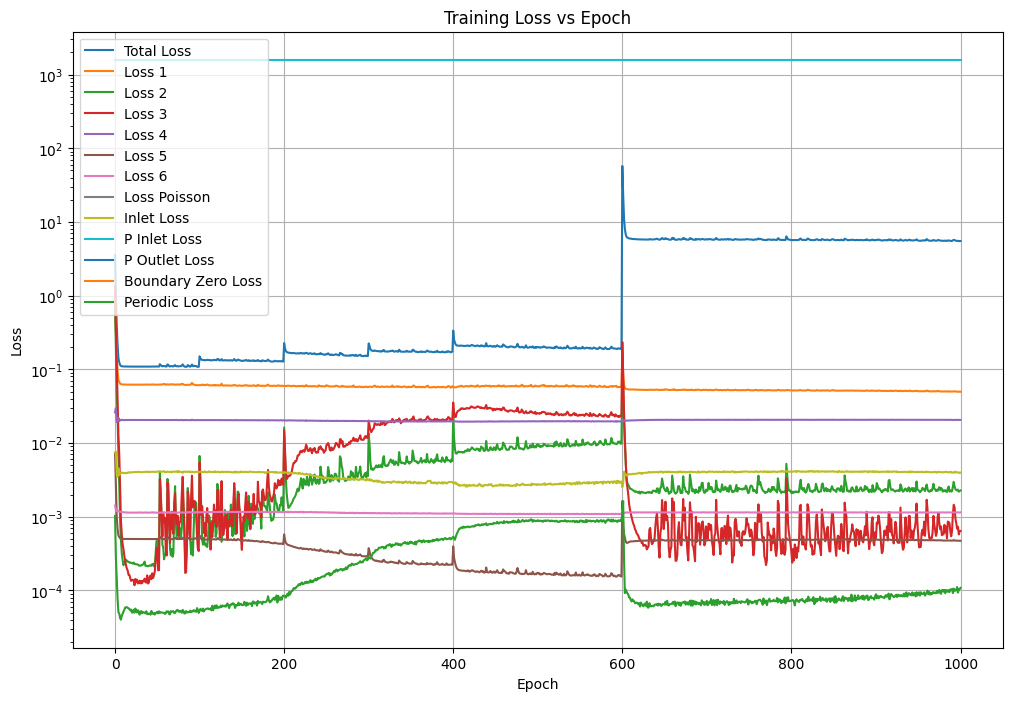

In [10]:
net1, net2, net3 = main()